Head of the dataset:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0

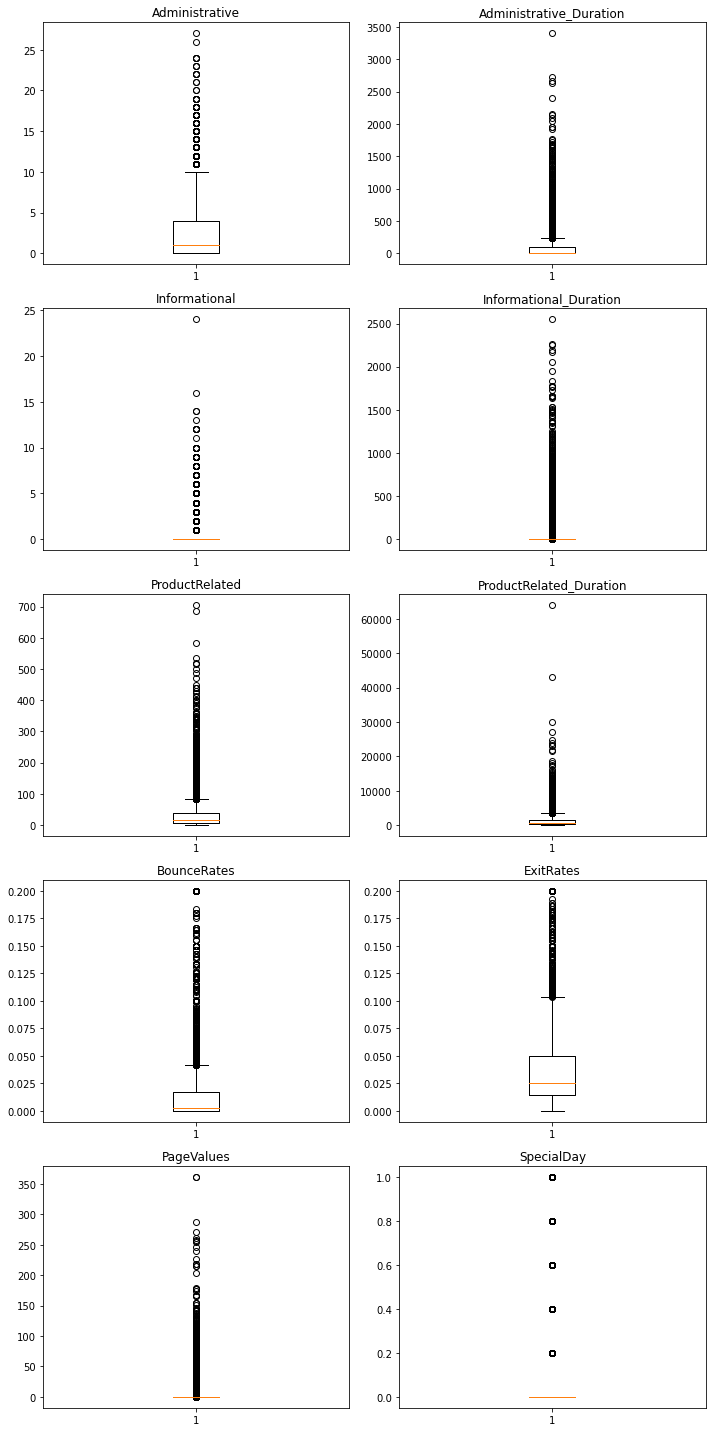

Inconsistent Rows:
       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
2                   0                      0.0              0   
6                   0                      0.0              0   
7                   1                      0.0              0   
16                  0                      0.0              0   
...               ...                      ...            ...   
12257               0                      0.0              1   
12301               0                      0.0              0   
12311               1                      0.0              2   
12321               0                      0.0              0   
12324               0                      0.0              1   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                        0.00        1.000000                  0.00000   
2                        0.00        1.000000       

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('online_shoppers_intention.csv')



                                                         # Task 1
    
                                                #Exploratory Data Analysis
data = pd.read_csv('online_shoppers_intention.csv')

# Display header data
print("Head of the dataset:")
print(data.head())

# Show tail data
print("\nTail of the dataset:")
print(data.tail())

# Display general information about the data
print("\nDataset information:")
print(data.info())

# Display descriptive statistical information about the data
print("\nDataset description:")
print(data.describe())

                                                     #Check for missing values

missing_values = data.isnull()

# Calculate the number of missing values per column
missing_values_count = missing_values.sum()

# Output the number of missing values per column
print("Missing values count in each column:")
print(missing_values_count)

# Total number of missing values output
print(f"\nTotal missing values in the dataset: {missing_values_count.sum()}")




                                                 # Detecting outliers and handling them

# Define a function to calculate the IQR
def calculate_iqr_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


numeric_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                   'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Calculate the IQR bounds for each value column and identify outliers
outliers = {}
for column_name in numeric_columns:
    lower_bound, upper_bound = calculate_iqr_bounds(data[column_name])
    outliers[column_name] = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]


print("Number of outliers in each numeric column:")
for column_name, outlier_data in outliers.items():
    print(f"{column_name}: {len(outlier_data)}")
    
# Generate a box plot for each column of data   
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))
for i, column_name in enumerate(numeric_columns):
    row = i // 2
    col = i % 2
    axes[row, col].boxplot(data[column_name])
    axes[row, col].set_title(column_name)

plt.tight_layout()
plt.show()




columns_to_replace = ['ProductRelated', 'ProductRelated_Duration']
# Calculate the mean value of all specified columns
column_means = {}
for column_name in columns_to_replace:
    column_means[column_name] = data[column_name].mean()

# Iterate through the data set, replacing outliers
for index, row in data.iterrows():
    for column_name in columns_to_replace:
        if index in outliers[column_name].index:
            data.loc[index, column_name] = column_means[column_name]



# Check for unqualified rows: one column has a value of 0 and the other has a value other than 0.
inconsistent_rows = data[
    ((data['Administrative'] == 0) & (data['Administrative_Duration'] != 0))
    | ((data['Administrative'] != 0) & (data['Administrative_Duration'] == 0))
    | ((data['Informational'] == 0) & (data['Informational_Duration'] != 0))
    | ((data['Informational'] != 0) & (data['Informational_Duration'] == 0))
    | ((data['ProductRelated'] == 0) & (data['ProductRelated_Duration'] != 0))
    | ((data['ProductRelated'] != 0) & (data['ProductRelated_Duration'] == 0))
]


print("Inconsistent Rows:")
print(inconsistent_rows)

# Delete unqualified rows      
data = data[~data.index.isin(inconsistent_rows.index)]

# Use the values of the processed columns, do not contain 0's row to calculate the median and do not contain 0's row to check for outliers, and then replace the outliers with the median
# List the columns that need to be processed
columns_to_process = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration']

# Process each column
for column_name in columns_to_process:
    non_zero_rows = data[data[column_name] != 0]
    
    median_value = non_zero_rows[column_name].median()
    
    # Check for outliers and replace with median
    data.loc[non_zero_rows.index, column_name] = non_zero_rows[column_name].where(
        non_zero_rows[column_name] <= 3 * median_value, median_value
    )
            
           
            
            
#Reset Index
data = data.reset_index(drop=True)

                                                  #Data conversion
    
data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)





                                            #Export the processed dataset

data.to_csv('processed_online_shoppers_intention.csv', index=False)


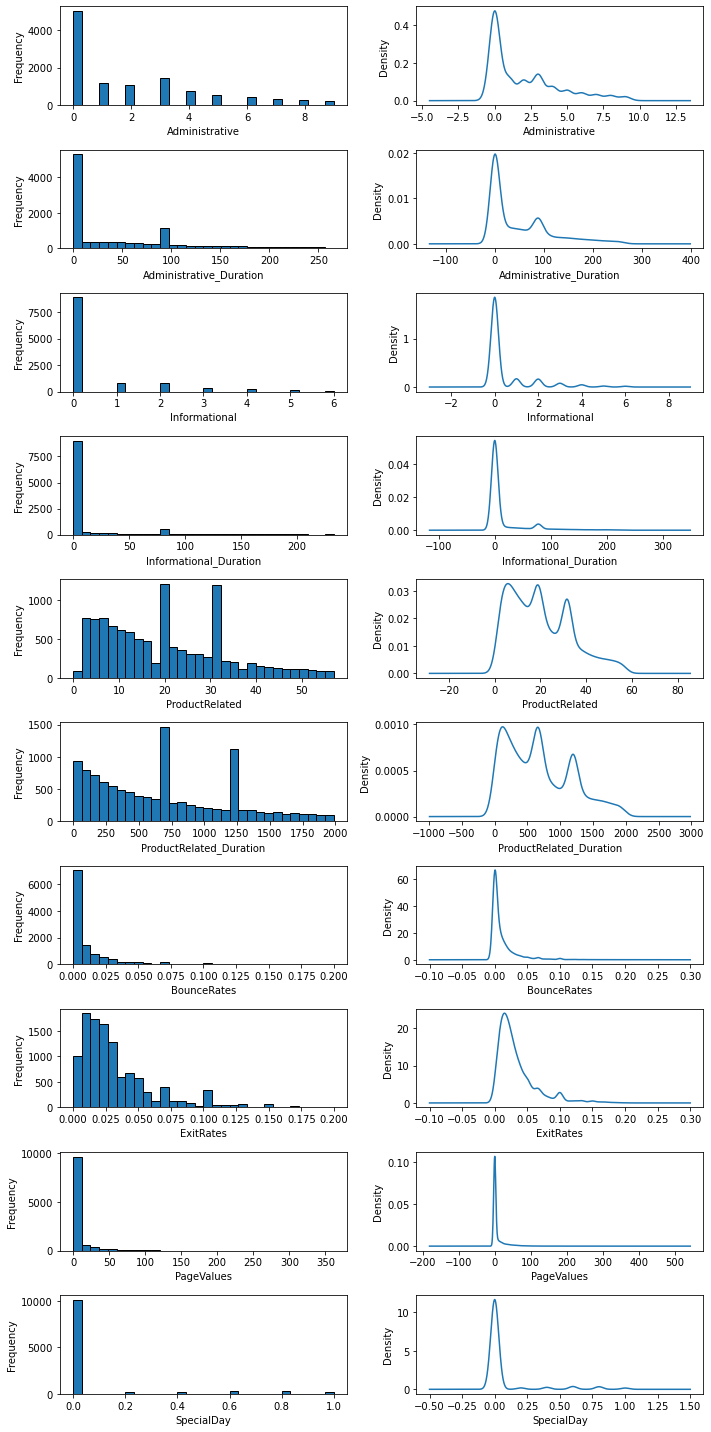

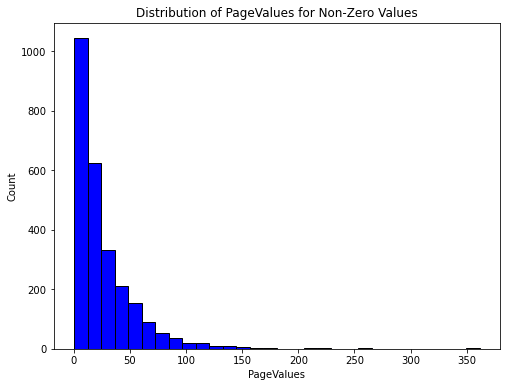

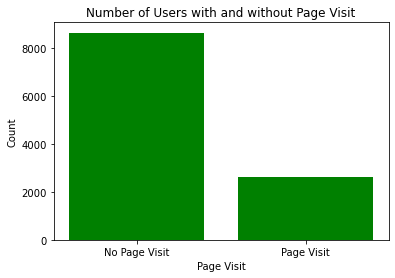

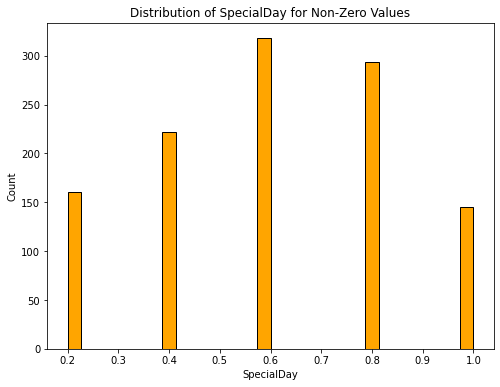

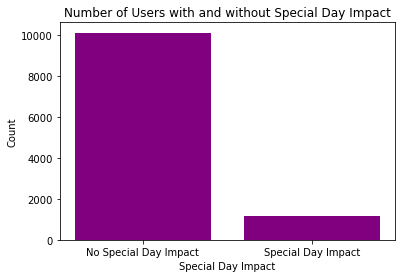

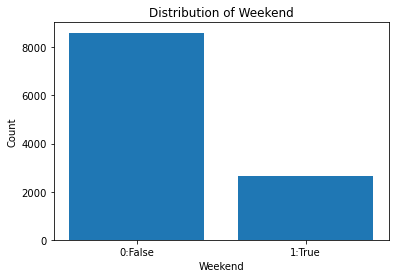

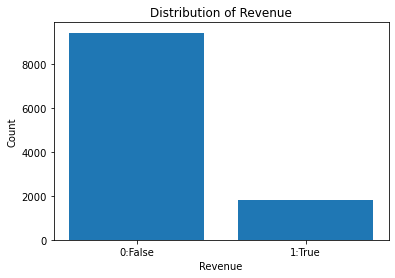

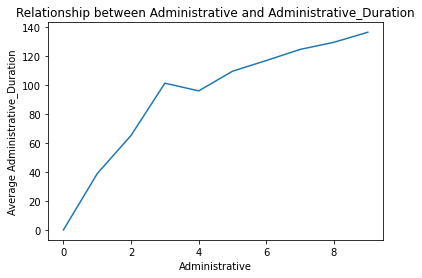

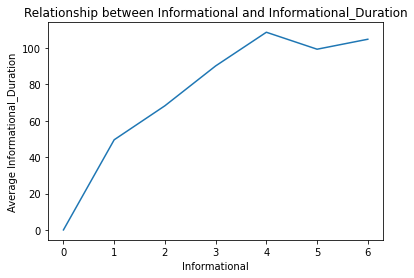

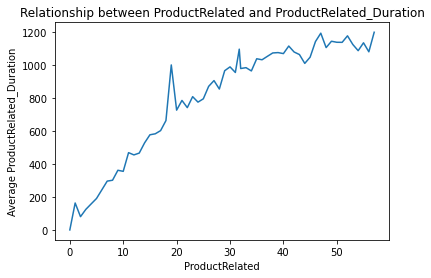

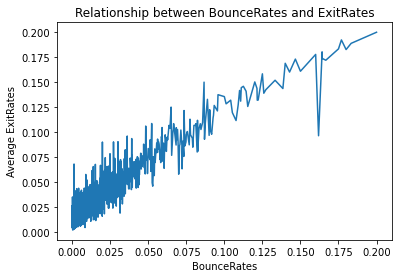

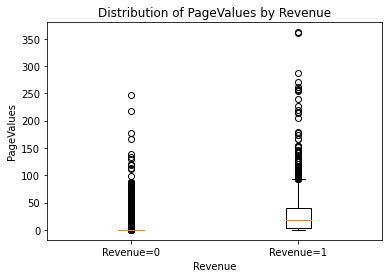

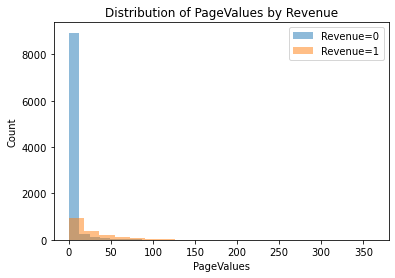

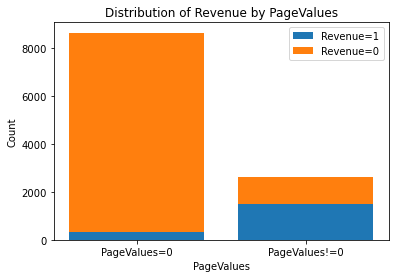

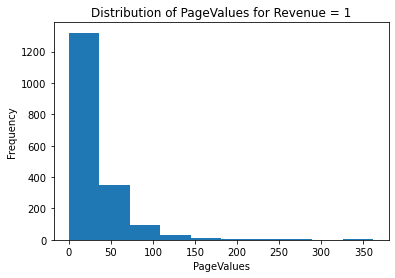

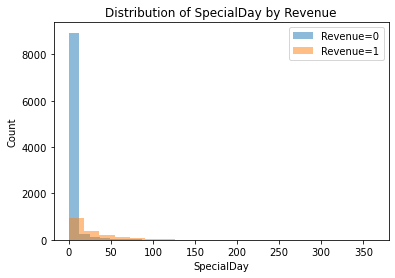

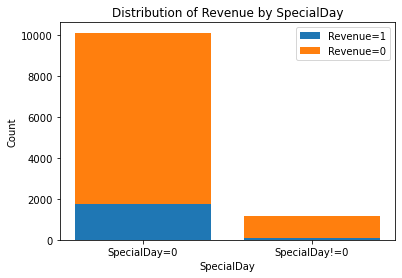

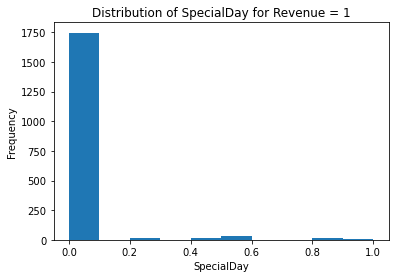

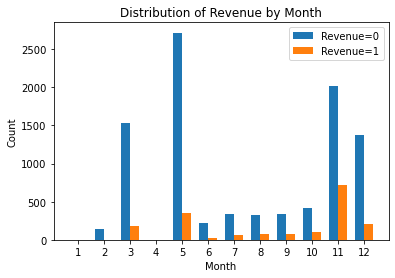

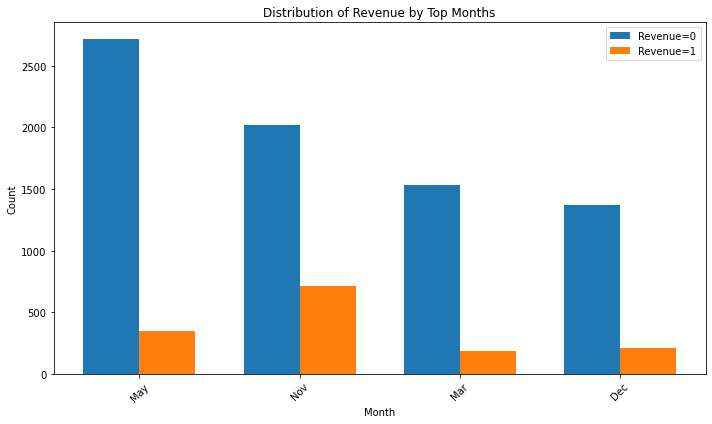

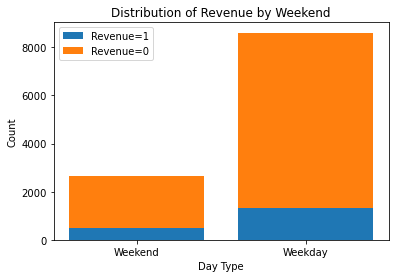

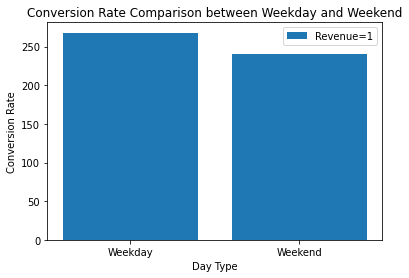

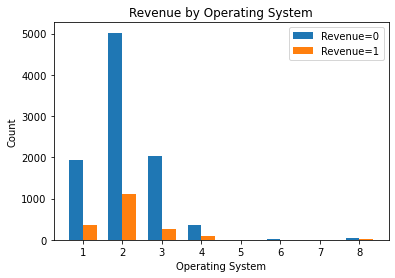

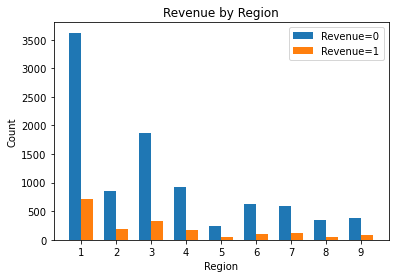

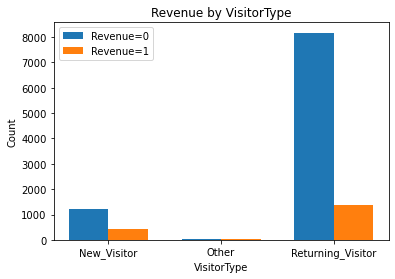

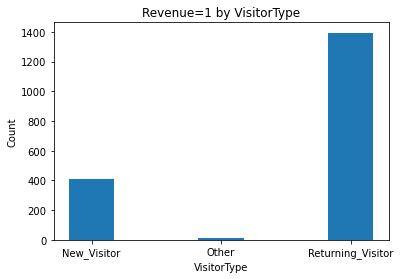

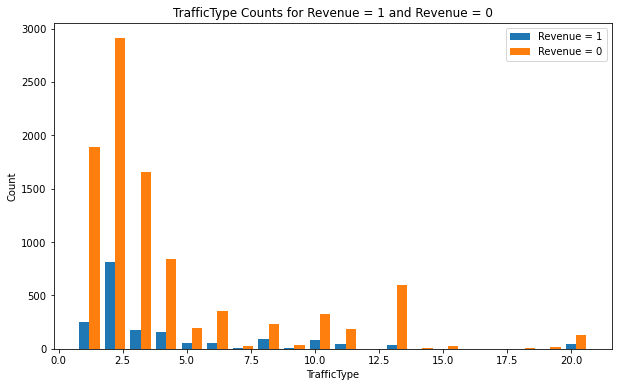

In [2]:

                                                  #Task 2
             
                                     
                                               #Explore 12 columns of data
    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('processed_online_shoppers_intention.csv')
data = pd.read_csv('processed_online_shoppers_intention.csv')

numeric_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                   'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
                                                 #Check the data distribution
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(10, 20))

for i, column_name in enumerate(numeric_columns):
    # Histogram
    axes[i, 0].hist(data[column_name], bins=30, edgecolor='k')
    axes[i, 0].set_xlabel(column_name)
    axes[i, 0].set_ylabel('Frequency')

    # Kernel density estimation map
    data[column_name].plot.kde(ax=axes[i, 1])
    axes[i, 1].set_xlabel(column_name)
    axes[i, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()


       # distribution of users visiting web pages before transactions and the number of users not visiting web pages at all

# Extract non-zero value PageValues
page_values = data[data['PageValues'] > 0]['PageValues']

plt.figure(figsize=(8, 6))
plt.hist(page_values, bins=30, color='blue', edgecolor='black')
plt.xlabel('PageValues')
plt.ylabel('Count')
plt.title('Distribution of PageValues for Non-Zero Values')
plt.show()

# of users who do not visit the page at all
no_page_visit_count = len(data[data['PageValues'] == 0])

# Histogram of the number of users who do not visit the page
plt.figure(figsize=(6, 4))
plt.bar(['No Page Visit', 'Page Visit'], [no_page_visit_count, len(data) - no_page_visit_count], color='green')
plt.xlabel('Page Visit')
plt.ylabel('Count')
plt.title('Number of Users with and without Page Visit')
plt.show()


                          # Distribution of users affected by special holidays and number of users not affected by holidays at all
# Extract the non-zero value of SpecialDay
special_day_values = data[data['SpecialDay'] > 0]['SpecialDay']


plt.figure(figsize=(8, 6))
plt.hist(special_day_values, bins=30, color='orange', edgecolor='black')
plt.xlabel('SpecialDay')
plt.ylabel('Count')
plt.title('Distribution of SpecialDay for Non-Zero Values')
plt.show()

# of users counted who are completely unaffected by the holiday
no_special_day_count = len(data[data['SpecialDay'] == 0])

# Histogram of the number of users unaffected by holidays
plt.figure(figsize=(6, 4))
plt.bar(['No Special Day Impact', 'Special Day Impact'], [no_special_day_count, len(data) - no_special_day_count], color='purple')
plt.xlabel('Special Day Impact')
plt.ylabel('Count')
plt.title('Number of Users with and without Special Day Impact')
plt.show()


# The distribution of the values of "Weekend"
weekend_counts = df['Weekend'].value_counts()
weekend_labels = ['0:False', '1:True']
plt.bar(weekend_labels, weekend_counts)
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.title('Distribution of Weekend')
plt.show()

# The distribution of the values of "Revenue"
revenue_counts = df['Revenue'].value_counts()
revenue_labels = ['0:False', '1:True']
plt.bar(revenue_labels, revenue_counts)
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Distribution of Revenue')
plt.show()




# 1. Administrative and Administrative_Duration
# Calculate the average value of Administrative_Duration based on the value of Administrative
avg_admin_duration = df.groupby('Administrative')['Administrative_Duration'].mean()
# Create line graphs
plt.plot(avg_admin_duration.index, avg_admin_duration.values)
plt.xlabel('Administrative')
plt.ylabel('Average Administrative_Duration')
plt.title('Relationship between Administrative and Administrative_Duration')
plt.show()

# 2. Informational and Informational_Duration
# Calculate the average value of Informational_Duration based on the value of Informational
avg_info_duration = df.groupby('Informational')['Informational_Duration'].mean()
# Create line graphs
plt.plot(avg_info_duration.index, avg_info_duration.values)
plt.xlabel('Informational')
plt.ylabel('Average Informational_Duration')
plt.title('Relationship between Informational and Informational_Duration')
plt.show()

# 3. ProductRelated and ProductRelated_Duration
# Calculate the average of ProductRelated_Duration based on the value of ProductRelated
avg_product_duration = df.groupby('ProductRelated')['ProductRelated_Duration'].mean()
# Create line graphs
plt.plot(avg_product_duration.index, avg_product_duration.values)
plt.xlabel('ProductRelated')
plt.ylabel('Average ProductRelated_Duration')
plt.title('Relationship between ProductRelated and ProductRelated_Duration')
plt.show()


# 4. BounceRates and ExitRates
# Calculate the average of ExitRates based on the value of BounceRates
avg_product_duration = df.groupby('BounceRates')['ExitRates'].mean()
# Create line graphs
plt.plot(avg_product_duration.index, avg_product_duration.values)
plt.xlabel('BounceRates')
plt.ylabel('Average ExitRates')
plt.title('Relationship between BounceRates and ExitRates')
plt.show()



# 5. PageValues and Revenue
# Divide the data into two groups based on the Revenue value
revenue_0 = df[df['Revenue'] == 0]['PageValues']
revenue_1 = df[df['Revenue'] == 1]['PageValues']
# Create box line diagrams
plt.boxplot([revenue_0, revenue_1], labels=['Revenue=0', 'Revenue=1'])
plt.xlabel('Revenue')
plt.ylabel('PageValues')
plt.title('Distribution of PageValues by Revenue')
plt.show()
# Create histogram
plt.hist(revenue_0, bins=20, alpha=0.5, label='Revenue=0')
plt.hist(revenue_1, bins=20, alpha=0.5, label='Revenue=1')
plt.xlabel('PageValues')
plt.ylabel('Count')
plt.title('Distribution of PageValues by Revenue')
plt.legend()
plt.show()
# Get the number of PageValues of 0 with Revenue=1 and Revenue=0
pagevalues_0_revenue_1 = df[(df['PageValues'] == 0) & (df['Revenue'] == 1)].shape[0]
pagevalues_0_revenue_0 = df[(df['PageValues'] == 0) & (df['Revenue'] == 0)].shape[0]
# Get the number of PageValues that are not 0 with Revenue=1 and Revenue=0
pagevalues_nonzero_revenue_1 = df[(df['PageValues'] != 0) & (df['Revenue'] == 1)].shape[0]
pagevalues_nonzero_revenue_0 = df[(df['PageValues'] != 0) & (df['Revenue'] == 0)].shape[0]
# Create bar charts
x = ['PageValues=0', 'PageValues!=0']
revenue_1_counts = [pagevalues_0_revenue_1, pagevalues_nonzero_revenue_1]
revenue_0_counts = [pagevalues_0_revenue_0, pagevalues_nonzero_revenue_0]
plt.bar(x, revenue_1_counts, label='Revenue=1')
plt.bar(x, revenue_0_counts, bottom=revenue_1_counts, label='Revenue=0')
plt.xlabel('PageValues')
plt.ylabel('Count')
plt.title('Distribution of Revenue by PageValues')
plt.legend()
plt.show()
# Explore what values the Revenue equals 1 and the PageValues are concentrated in.
data_revenue_1 = df[df['Revenue'] == 1]
page_values_revenue_1 = data_revenue_1['PageValues']
plt.hist(page_values_revenue_1, bins=10)
plt.xlabel('PageValues')
plt.ylabel('Frequency')
plt.title('Distribution of PageValues for Revenue = 1')
plt.show()


# 6. SpecialDay and Revenue
# Create histogram
plt.hist(revenue_0, bins=20, alpha=0.5, label='Revenue=0')
plt.hist(revenue_1, bins=20, alpha=0.5, label='Revenue=1')
plt.xlabel('SpecialDay')
plt.ylabel('Count')
plt.title('Distribution of SpecialDay by Revenue')
plt.legend()
plt.show()
# Get the number of Revenue=1 and Revenue=0 for a SpecialDay of 0
specialday_0_revenue_1 = df[(df['SpecialDay'] == 0) & (df['Revenue'] == 1)].shape[0]
specialday_0_revenue_0 = df[(df['SpecialDay'] == 0) & (df['Revenue'] == 0)].shape[0]
# Get the number of Revenue=1 and Revenue=0 for which SpecialDay is not 0
specialday_nonzero_revenue_1 = df[(df['SpecialDay'] != 0) & (df['Revenue'] == 1)].shape[0]
specialday_nonzero_revenue_0 = df[(df['SpecialDay'] != 0) & (df['Revenue'] == 0)].shape[0]
# Create bar charts
x = ['SpecialDay=0', 'SpecialDay!=0']
revenue_1_counts = [specialday_0_revenue_1, specialday_nonzero_revenue_1]
revenue_0_counts = [specialday_0_revenue_0, specialday_nonzero_revenue_0]
plt.bar(x, revenue_1_counts, label='Revenue=1')
plt.bar(x, revenue_0_counts, bottom=revenue_1_counts, label='Revenue=0')
plt.xlabel('SpecialDay')
plt.ylabel('Count')
plt.title('Distribution of Revenue by SpecialDay')
plt.legend()
plt.show()
# Explore what values Revenue equals 1 and SpecialDay concentrates on.
data_revenue_1 = df[df['Revenue'] == 1]
specialday_revenue_1 = data_revenue_1['SpecialDay']
plt.hist(specialday_revenue_1, bins=10)
plt.xlabel('SpecialDay')
plt.ylabel('Frequency')
plt.title('Distribution of SpecialDay for Revenue = 1')
plt.show()


#7. Month and Revenue
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Number of months where Revenue is 0 and 1
revenue_0_counts = df[df['Revenue'] == 0]['Month'].value_counts().reindex(month_mapping.keys(), fill_value=0)
revenue_1_counts = df[df['Revenue'] == 1]['Month'].value_counts().reindex(month_mapping.keys(), fill_value=0)
# Generate a sequence of integers as a scale for the x-axis
x = np.arange(len(month_mapping)) 
# Get a list of month names
labels = list(month_mapping.values())  
width = 0.35
plt.bar(x - width/2, revenue_0_counts, width, label='Revenue=0')
plt.bar(x + width/2, revenue_1_counts, width, label='Revenue=1')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Revenue by Month')
# Use month name as scale label
plt.xticks(x, labels)  
plt.legend()
plt.show()

# count the number of views per month and the number of Revenues of 1
month_views = df['Month'].value_counts().sort_values(ascending=False)
month_revenue_1 = df[df['Revenue'] == 1]['Month'].value_counts().sort_index()
# The top four months for getting the most views
top_months = month_views.head(4).index.tolist()
# Get the number of months with a Revenue of 0 and a Revenue of 1
revenue_0_counts = df[df['Revenue'] == 0]['Month'].value_counts().reindex(top_months, fill_value=0).values
revenue_1_counts = month_revenue_1.reindex(top_months, fill_value=0).values

x = np.arange(len(top_months))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, revenue_0_counts, width, label='Revenue=0')
ax.bar(x + width/2, revenue_1_counts, width, label='Revenue=1')
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Distribution of Revenue by Top Months')
ax.set_xticks(x)
ax.set_xticklabels(top_months, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


#8.Weekend and Revenue
# The number of visits on weekends and non-weekends and the number of visits with a corresponding Revenue of 1 and Revenue of 0
weekend_revenue_1 = df[(df['Weekend'] == 1) & (df['Revenue'] == 1)].shape[0]
weekend_revenue_0 = df[(df['Weekend'] == 1) & (df['Revenue'] == 0)].shape[0]
weekday_revenue_1 = df[(df['Weekend'] == 0) & (df['Revenue'] == 1)].shape[0]
weekday_revenue_0 = df[(df['Weekend'] == 0) & (df['Revenue'] == 0)].shape[0]
x = ['Weekend', 'Weekday']
revenue_1_counts = [weekend_revenue_1, weekday_revenue_1]
revenue_0_counts = [weekend_revenue_0, weekday_revenue_0]
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x, revenue_1_counts, label='Revenue=1')
ax.bar(x, revenue_0_counts, bottom=revenue_1_counts, label='Revenue=0')
ax.set_xlabel('Day Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Revenue by Weekend')
ax.legend()
plt.show()


# Compare the average number of transactions per day on weekends and weekdays
# Get weekday dataset and weekend dataset
weekday_data = df[df['Weekend'] == 0]
weekend_data = df[df['Weekend'] == 1]
# Calculate the turnover rate for weekdays and weekends
weekday_revenue_1 = weekday_data[weekday_data['Revenue'] == 1].shape[0]
weekday_total = 5
weekend_revenue_1 = weekend_data[weekend_data['Revenue'] == 1].shape[0]
weekend_total = 2
x = ['Weekday', 'Weekend']
revenue_1_counts = [weekday_revenue_1/weekday_total, weekend_revenue_1/weekend_total]
plt.bar(x, revenue_1_counts, label='Revenue=1')
plt.xlabel('Day Type')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate Comparison between Weekday and Weekend')
plt.legend()
plt.show()


#9.OperatingSystems and Revenue
# Count the records with Revenue of 1 according to the operating system
revenue_1_counts = df[df['Revenue'] == 1]['OperatingSystems'].value_counts().sort_index()
# Records with a Revenue of 0 are counted according to the operating system
revenue_0_counts = df[df['Revenue'] == 0]['OperatingSystems'].value_counts().sort_index()
x = revenue_1_counts.index
width = 0.35
plt.bar(x - width/2, revenue_0_counts, width, label='Revenue=0')
plt.bar(x + width/2, revenue_1_counts, width, label='Revenue=1')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.title('Revenue by Operating System')
plt.legend()
plt.show()

#10.Region and Revenue
# Count the records with Revenue of 1 by region
revenue_1_counts = df[df['Revenue'] == 1]['Region'].value_counts().sort_index()
# Count records with a Revenue of 0 by region
revenue_0_counts = df[df['Revenue'] == 0]['Region'].value_counts().sort_index()
x = np.arange(len(revenue_1_counts))  # Use the number as the position of the x-axis
width = 0.35
plt.bar(x - width/2, revenue_0_counts, width, label='Revenue=0')
plt.bar(x + width/2, revenue_1_counts, width, label='Revenue=1')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Revenue by Region')
plt.xticks(x, labels=revenue_1_counts.index)  # Use region name as scale label
plt.legend()
plt.show()

#11.VisitorType and Revenue
# Records with Revenue of 1 and 0 are counted according to the VisitorType
revenue_1_counts = df[df['Revenue'] == 1]['VisitorType'].value_counts().sort_index()
revenue_0_counts = df[df['Revenue'] == 0]['VisitorType'].value_counts().sort_index()
x = np.arange(len(revenue_1_counts)) 
width = 0.35
plt.bar(x - width/2, revenue_0_counts, width, label='Revenue=0')
plt.bar(x + width/2, revenue_1_counts, width, label='Revenue=1')
plt.xlabel('VisitorType')
plt.ylabel('Count')
plt.title('Revenue by VisitorType')
plt.xticks(x, labels=revenue_1_counts.index) 
plt.legend()
plt.show()

# Count the records with Revenue of 1 by VisitorType
revenue_1_counts = df[df['Revenue'] == 1]['VisitorType'].value_counts().sort_index()
x = np.arange(len(revenue_1_counts))  
width = 0.35
plt.bar(x, revenue_1_counts, width)
plt.xlabel('VisitorType')
plt.ylabel('Count')
plt.title('Revenue=1 by VisitorType')
plt.xticks(x, labels=revenue_1_counts.index) 
plt.show()

#12.TrafficType and Revenue
revenue_1_data = data[data['Revenue'] == 1]
revenue_0_data = data[data['Revenue'] == 0]
revenue_1_traffic_type_counts = revenue_1_data['TrafficType'].astype(int).value_counts()
revenue_0_traffic_type_counts = revenue_0_data['TrafficType'].astype(int).value_counts()

# Get all existing TrafficType types
all_traffic_types = np.union1d(revenue_1_traffic_type_counts.index, revenue_0_traffic_type_counts.index)

plt.figure(figsize=(10, 6))

# Plot a bar chart with 'Revenue' of 1
plt.bar(all_traffic_types, revenue_1_traffic_type_counts.reindex(all_traffic_types, fill_value=0), label='Revenue = 1', width=0.4)

# Plot a histogram with 'Revenue' at 0, offset it by a certain distance
plt.bar(all_traffic_types+0.4, revenue_0_traffic_type_counts.reindex(all_traffic_types, fill_value=0), label='Revenue = 0', width=0.4)

plt.xlabel('TrafficType')
plt.ylabel('Count')
plt.title('TrafficType Counts for Revenue = 1 and Revenue = 0')
plt.legend()
plt.show()

In [4]:
#Task 3
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
df = pd.read_csv('processed_online_shoppers_intention.csv')
# Select appropriate features and target variables
X = df[['PageValues','Weekend','Region','OperatingSystems','TrafficType','ProductRelated','ProductRelated_Duration']]
y = df['Revenue']

highest = (0,0)
#K-nearest neighbors classifier (KNeighborsClassifier) and 5-fold cross-validation.
for i in range(2,20):
    # Create KNN classifier object
    knn = KNeighborsClassifier(n_neighbors=i)  # set the K

    # Perform cross-validation
    scores = cross_val_score(knn, X, y, cv=5)  # Use 50% off cross validation

    # Output the accuracy score for each fold
    print("Cross-Validation Scores:", scores)

    # 输出平均准确度得分
    print("Average Score:", scores.mean())
    if scores.mean() > highest[0]:
        highest = (scores.mean(),i)

print("Highest score", highest)



#Decision Tree Classifier and 5-fold cross-validation.
from sklearn import tree
# Fitting a decision tree model to the dataset using the fit method

best_model = None
highest_score = 0

from sklearn.tree import DecisionTreeClassifier
highest = (0, 0)
for i in range(3, 20):
    clf = DecisionTreeClassifier(max_depth=i)
    
    scores = cross_val_score(clf, X, y, cv=5)
    
    print("Cross-Validation Scores:", scores)
    print("Average Score:", scores.mean())
    
    if scores.mean() > highest[0]:
        highest = (scores.mean(), i)
        
        best_model = clf
        
print("Highest score:", highest)
# Export the decision tree model with the highest score as a file

if best_model is not None:
    best_model.fit(X, y)
    tree.export_graphviz(best_model, out_file='treeOfHigntestScore.dot', 
                     feature_names=['PageValues','Weekend','Region','OperatingSystems','TrafficType','ProductRelated','ProductRelated_Duration'], 
                     class_names=['No Revenue', 'Revenue'], 
                     filled=True, 
                     rounded=True,
                     special_characters=True)
    print("Export successed")


Cross-Validation Scores: [0.88326676 0.86856128 0.86722913 0.84902309 0.85257549]
Average Score: 0.8641311486007603
Cross-Validation Scores: [0.8996893  0.88055062 0.86634103 0.85213144 0.86012433]
Average Score: 0.8717673455325798
Cross-Validation Scores: [0.88948069 0.87655417 0.86634103 0.84236234 0.86634103]
Average Score: 0.8682158542901945
Cross-Validation Scores: [0.90501553 0.88454707 0.86856128 0.85479574 0.86989343]
Average Score: 0.876562609632785
Cross-Validation Scores: [0.89480692 0.87566607 0.87033748 0.85257549 0.87078153]
Average Score: 0.8728334984969714
Cross-Validation Scores: [0.90501553 0.88543517 0.87078153 0.85657194 0.87122558]
Average Score: 0.8778059488867813
Cross-Validation Scores: [0.89702619 0.88365897 0.87033748 0.85346359 0.87033748]
Average Score: 0.8749647401254613
Cross-Validation Scores: [0.90368398 0.89076377 0.86989343 0.85612789 0.86811723]
Average Score: 0.8777172571956555
Cross-Validation Scores: [0.90013316 0.88676732 0.87211368 0.85035524 0.8